In [1]:
import norm_heatmap
import normalize
import experiment_normalized_depth_loss
import agg_depth_loss
import depth_loss
import tools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [22]:
stack_dir = os.path.abspath("D:/Work_Experience/Franco_Lab/data/hmp_paper/hsp90_3NT56/P2X7/")
norm_dir = os.path.abspath("D:/Work_Experience/Franco_Lab/data/hmp_paper/hsp90_3NT56/DAPI/")
stack_name = os.path.basename(stack_dir)
norm_name = os.path.basename(norm_dir)
base_dir = os.path.basename(os.path.dirname(norm_dir))
out_dir = os.path.abspath(os.path.join(os.path.abspath(''), '..', f"{base_dir}_{stack_name}n{norm_name}_out"))
print(out_dir)


D:\Work_Experience\Franco_Lab\3d_heatmap\hsp90_3NT56_P2X7nDAPI_out


# Getting raw heatmap

In [3]:
tiffs = tools.get_files(stack_dir)

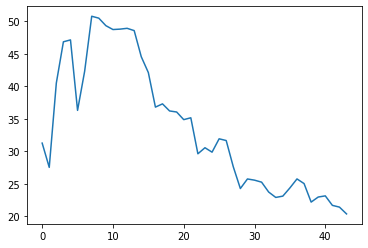

In [4]:
means = []
for tiff in tiffs:
    means.append(normalize.tiff_mean(tiff, 0, -1, True, 0))
plt.plot(np.arange(0, len(means)), means)

In [7]:
imgs = norm_heatmap.stack(tiffs, ['z', 'x', 'y'], 20)

Generating composites for x, y and z view(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7...
Completing post-processing for x, y and z composite(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7...


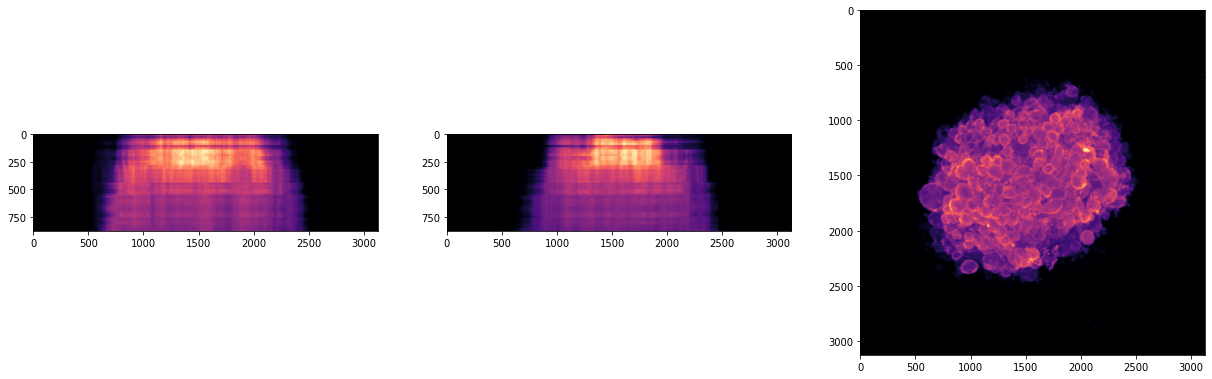

In [8]:
fig = plt.figure(figsize = (21, 7))
ax1 = fig.add_subplot(131)
ax1.imshow(imgs[0], cmap = 'magma')
ax2 = fig.add_subplot(132)
ax2.imshow(imgs[1], cmap = 'magma')
ax3 = fig.add_subplot(133)
ax3.imshow(imgs[2], cmap = 'magma')

### Getting normalized heatmap

In [9]:
norms = tools.get_files(norm_dir)

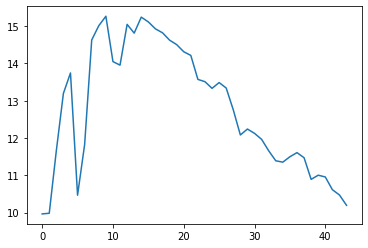

In [10]:
means = []
for norm_tiff in norms:
    means.append(normalize.tiff_mean(norm_tiff, 0, -1, True, 0))
plt.plot(np.arange(0, len(means)), means)

In [11]:
%%capture
norm_tiffs = normalize.mean_normalizer(tiffs, norms, 0, -1, True, False)

Folder already found at D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_DAPI. Should normalized TIFs be regenerated (1-y; 0-n)?  1


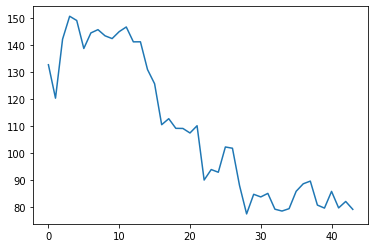

In [12]:
means = []
for norm_tiff in norm_tiffs:
    means.append(normalize.tiff_mean(norm_tiff, 0, -1, True, 0))
plt.plot(np.arange(0, len(means)), means)

In [13]:
imgs = norm_heatmap.stack(norm_tiffs, ['z', 'x', 'y'], 20)

Generating composites for z, x and y view(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_DAPI...
Completing post-processing for z, x and y composite(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_DAPI...


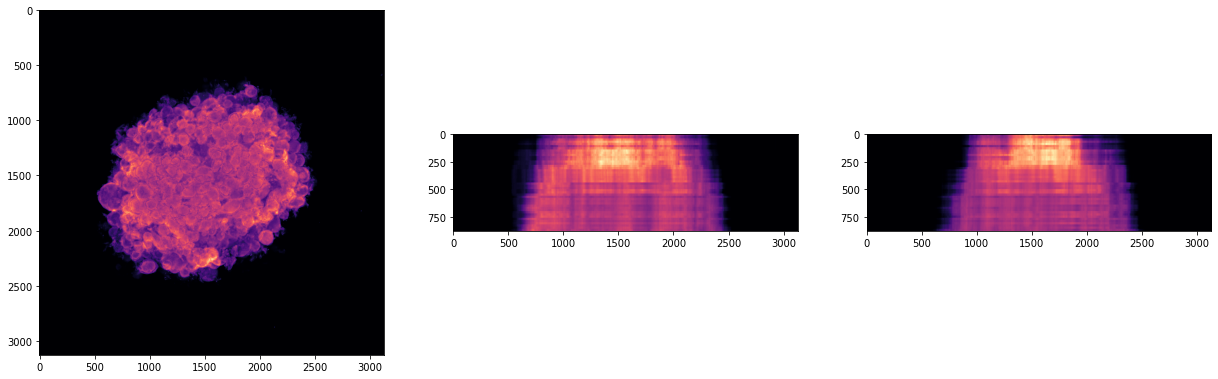

In [14]:
fig = plt.figure(figsize = (21, 7))
ax1 = fig.add_subplot(131)
ax1.imshow(imgs[0], cmap = 'magma')
ax2 = fig.add_subplot(132)
ax2.imshow(imgs[1], cmap = 'magma')
ax3 = fig.add_subplot(133)
ax3.imshow(imgs[2], cmap = 'magma')

### Normalizing heatmap with tumoroid boundary

In [15]:
#getting boundary...
bools = normalize.get_norm_bool_idxs(norms, 0.5)

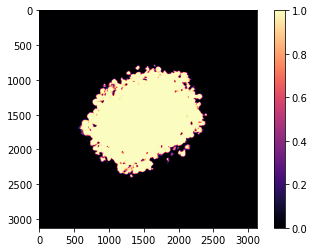

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
im = ax1.imshow(bools, cmap = 'magma')
plt.colorbar(im)

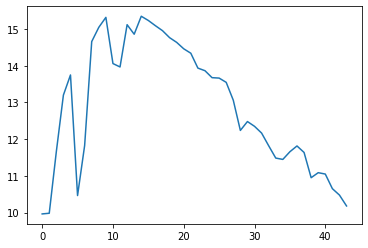

In [17]:
means = []
for norm_tiff in norms:
    means.append(normalize.tiff_mean(norm_tiff, 0, -1, True, bools))
plt.plot(np.arange(0, len(means)), means)

In [18]:
%%capture
norm_tiffs = normalize.mean_normalizer(tiffs, norms, 0, -1, True, True)

Folder already found at D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_im_DAPI. Should normalized TIFs be regenerated (1-y; 0-n)?  1


In [19]:
imgs = norm_heatmap.stack(norm_tiffs, ['z', 'x', 'y'], 20)

Generating composites for z, x and y view(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_im_DAPI...
Completing post-processing for z, x and y composite(s) from D:\Work_Experience\Franco_Lab\data\hmp_paper\hsp90_3NT56\P2X7_rn_im_DAPI...


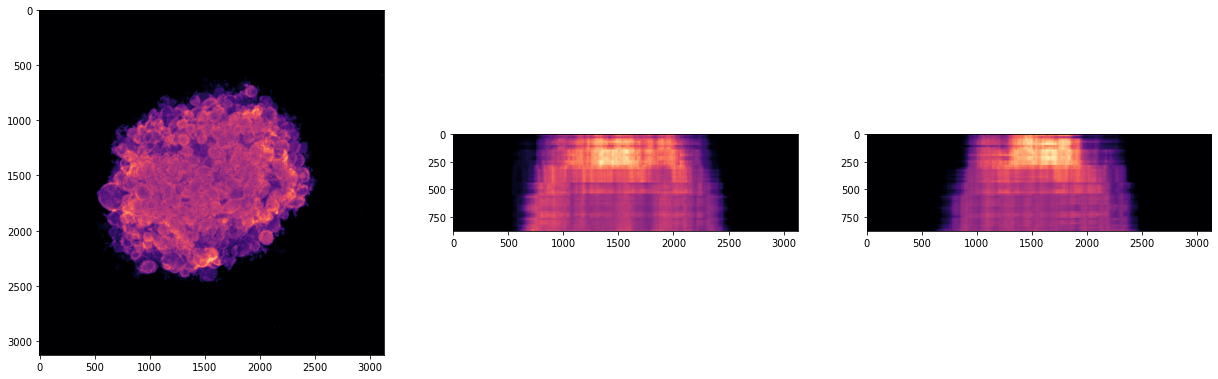

In [20]:
fig = plt.figure(figsize = (21, 7))
ax1 = fig.add_subplot(131)
ax1.imshow(imgs[0], cmap = 'magma')
ax2 = fig.add_subplot(132)
ax2.imshow(imgs[1], cmap = 'magma')
ax3 = fig.add_subplot(133)
ax3.imshow(imgs[2], cmap = 'magma')